In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Ideal Low Pass Filter

In [13]:
def ILPF(image, cutoff_frequency):
    height, width = image.shape
    ideal_filter = np.zeros((height, width))

    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height / 2)**2 + (v - width / 2)**2)
            if (D <= cutoff_frequency):
                ideal_filter[u, v] = 1

    filtered_image = image * ideal_filter
    filtered_image = np.fft.ifftshift(filtered_image)
    filtered_image = np.fft.ifft2(filtered_image)
    return np.abs(filtered_image)


# Load Image 

<function matplotlib.pyplot.show(close=None, block=None)>

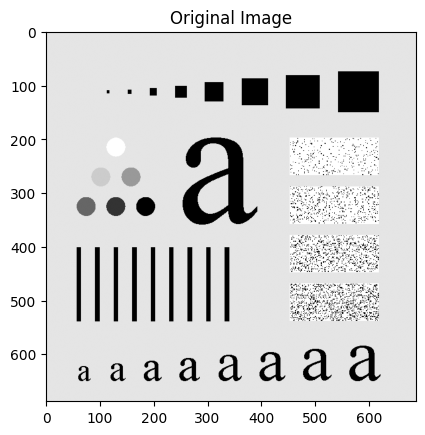

In [14]:
image = cv2.imread('Characters_Test_Pattern.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show

# Add Gaussian Noise

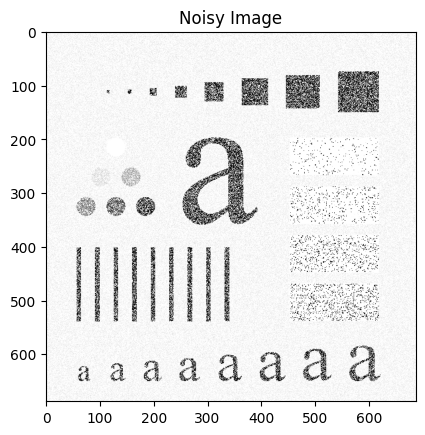

In [15]:
gaussian_noise = np.random.normal(5, 20, image.shape).astype(np.uint8)
noisy_image = cv2.add(image,gaussian_noise)

plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.show()

# Apply FFT

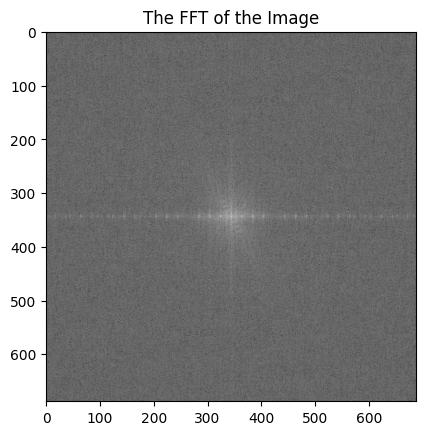

In [18]:
noisy_image_fft = np.fft.fftshift(np.fft.fft2(noisy_image))
plt.imshow(np.log(np.abs(noisy_image_fft)), cmap="gray")
plt.title("The FFT of the Image")
plt.show()


# Apply Ideal Low Pass Filter

Text(0.5, 1.0, 'Filtered Image with Filter Radius: 30')

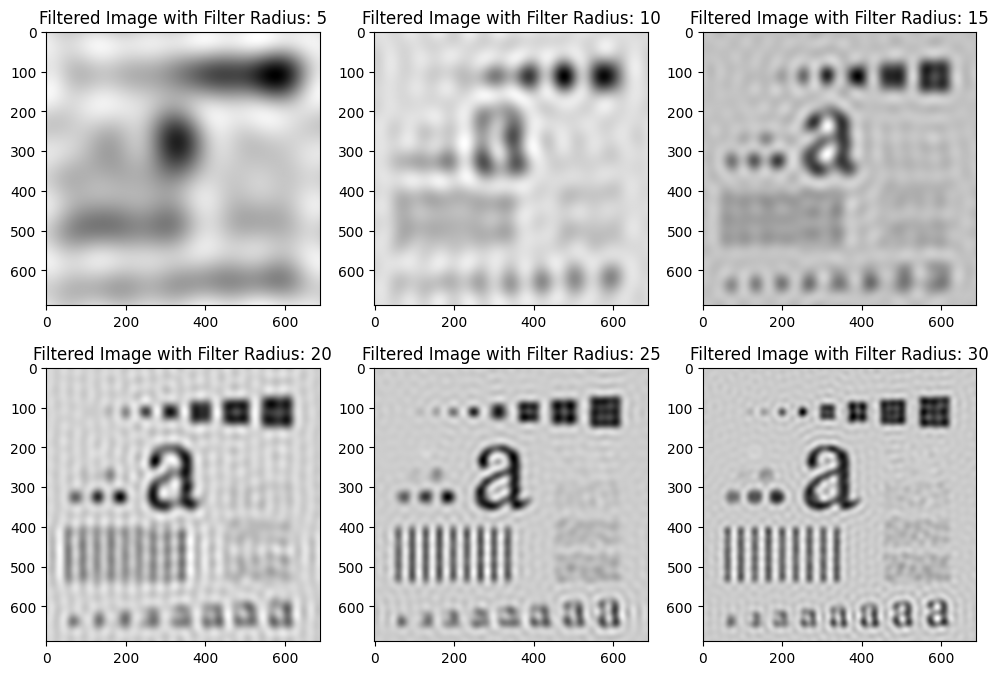

In [19]:
ilpf_image1 = ILPF(noisy_image_fft, 5)
ilpf_image2 = ILPF(noisy_image_fft, 10)
ilpf_image3 = ILPF(noisy_image_fft, 15)
ilpf_image4 = ILPF(noisy_image_fft, 20)
ilpf_image5 = ILPF(noisy_image_fft, 25)
ilpf_image6 = ILPF(noisy_image_fft, 30)

plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
plt.imshow(ilpf_image1, cmap='gray')
plt.title('Filtered Image with Filter Radius: 5')

plt.subplot(2,3,2)
plt.imshow(ilpf_image2, cmap='gray')
plt.title('Filtered Image with Filter Radius: 10')

plt.subplot(2,3,3)
plt.imshow(ilpf_image3, cmap='gray')
plt.title('Filtered Image with Filter Radius: 15')

plt.subplot(2,3,4)
plt.imshow(ilpf_image4, cmap='gray')
plt.title('Filtered Image with Filter Radius: 20')

plt.subplot(2,3,5)
plt.imshow(ilpf_image5, cmap='gray')
plt.title('Filtered Image with Filter Radius: 25')

plt.subplot(2,3,6)
plt.imshow(ilpf_image6, cmap='gray')
plt.title('Filtered Image with Filter Radius: 30')
